# 4.10 Part 1c Customer Profile and Visualizations

## Table of Contents

01. Import Libraries

02. Import Data 

03. Create Profiles and Visualizations Using Unique Customer ID DF
    > a. Bar Chart 'Average Spent per Order by Income Category'<br>
    > b. Pie Chart  'Customers That Have Pets and Kids'<br>
    > c. Pie Chart  'Customers That Have Pets and Babies'<br>
    > d. Pie Chart 'Average Spent Per Order'<br>
    > e. Pie Charts 'Income Categories by Age Group'<br>
    > f. Bar Chart 'Spending Categories by Region'<br>

04. Answer Key Questions and More Visualizations
    > a. Heatmap 'Frequency of Orders Placed by Day and Time'<br>
    > b. Bar Chart 'Time of Most Expensive Orders'<br>
    > c. Pie Chart 'Products Ordered by Price Range'<br>
    > d. Pie Chart 'Top 5 Departments'<br>
    > e. Pie Chart 'Top 5 Departments for Customers With Babies'<br>
    > f. Pie Chart 'Top 5 Departments Customers with Pets Ordered From'<br>
    > g. Pie Chart 'Top 5 Departments for Customers with Children'<br>
    > h. Bar Chart 'Top 5 Departments'<br>
    > i. Grouped Bar Chart 'Top 5 Departments by Income Category'<br>
    > j. Grouped Bar Chart 'Median Time Between Orders by Customer Loyalty'<br>
    > k. Histogram 'Median Days Between Orders'<br>
    > l. Histogram 'Median Days Since Last Order by Region'<br>
    > m. Grouped Bar Chart 'Age and Family Status'<br>

05. Export Visualizations and DFs

### 01. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy


## 02. Import Data


In [2]:
#create path
path = r'/Users/juliewhitton/Desktop/Instacart Basket Analysis/'

In [3]:
#import latest full dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'full_set_with_flags.pkl'))

#check import 
df.head()

,order_id,user_id,order_number,order_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,family_status,income,region,activity_flag,age_category,income_category,department,pet_owner,has_babies,has_kids
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,married,40423,South,High-activity Customer,Young Adult,Low income,beverages,No,No,Yes
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,married,40423,South,High-activity Customer,Young Adult,Low income,beverages,No,No,Yes
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,married,40423,South,High-activity Customer,Young Adult,Low income,beverages,No,No,Yes
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,married,40423,South,High-activity Customer,Young Adult,Low income,beverages,No,No,Yes
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,married,40423,South,High-activity Customer,Young Adult,Low income,beverages,No,No,Yes


In [4]:
#import unique customer df
df_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'unique_customers_final.pkl'))

#check import
df_cust.head()

,order_id,user_id,order_number,order_day_of_week,time_of_order,days_since_prior_order,product_id,prices,price_range_loc,max_order,...,activity_flag,age_category,income_category,department,pet_owner,has_babies,has_kids,spending_flag_ords,pets_babies,pets_kids
0,2539329,1,1,2,8,NaN,196,9.0,Mid-range product,10,...,High-activity Customer,Young Adult,Low income,beverages,No,No,Yes,High-spender,Neither,Kids Only
2,2293453,19,2,5,14,6.0,196,9.0,Mid-range product,9,...,High-activity Customer,Adult,Middle income,beverages,No,No,Yes,High-spender,Neither,Kids Only
3,1573906,21,10,3,10,6.0,196,9.0,Mid-range product,33,...,High-activity Customer,Senior,Middle income,beverages,No,No,No,High-spender,Neither,Neither
4,1593000,31,10,3,8,7.0,196,9.0,Mid-range product,20,...,High-activity Customer,Adult,Middle income,beverages,No,No,Yes,High-spender,Neither,Kids Only
5,2580647,43,6,4,16,4.0,196,9.0,Mid-range product,11,...,High-activity Customer,Adult,Middle income,beverages,No,No,Yes,High-spender,Neither,Kids Only


## 03. Create Profiles and Visualizations Using Unique Customer ID DF

### a. Bar Chart 'Average Spent per Order by Income Category'

Text(0.5, 1.0, 'Average Order Cost by Income Category')

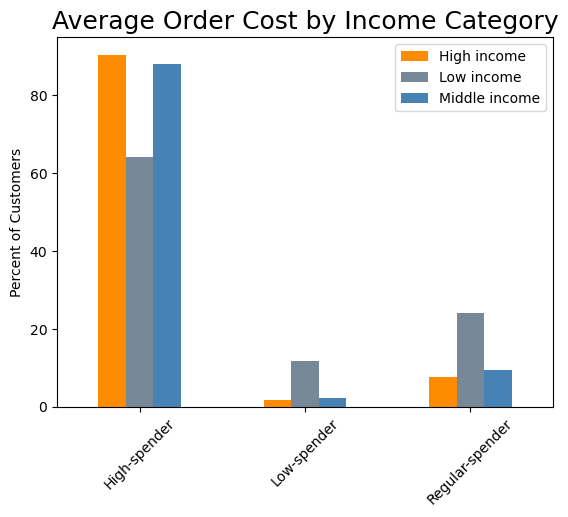

In [5]:
#per order spending flag crossed with income category
crosstab_income_avg_spent_ords = round(pd.crosstab (df_cust['spending_flag_ords'], df_cust['income_category'], 
                                              normalize = 'columns', dropna = False)*100, 2)

colors = ['darkorange', 'lightslategray', 'steelblue']

bar_income_avg_spent = crosstab_income_avg_spent_ords.plot.bar(color = colors, xlabel = '', 
                                                               ylabel = 'Percent of Customers', 
                                                               sort_columns = True)
plt.xticks(rotation = 45)
plt.legend(title = '')
plt.title('Average Order Cost by Income Category', fontsize = 18)

Customers in the low income category are more likely to fall into the low and regular spender categories.

### b. Pie Chart  'Customers That Have Pets and Kids'

Text(0.5, 1.0, 'Customers That Have Pets and Kids')

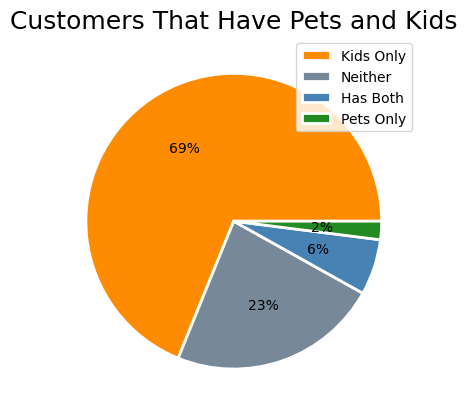

In [6]:
#pie chart for customers kids/pets
colors = ['darkorange', 'lightslategray', 'steelblue', 'forestgreen']

pie_pets_kids = df_cust['pets_kids'].value_counts().plot.pie(legend = True, ylabel = '', autopct = ('%1.f%%'),
                                                             wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
                                                             colors = colors, labeldistance = None)

plt.title('Customers That Have Pets and Kids', fontsize = 18)

23% of customers have neither kids nor pets.

### c. Pie Chart  'Customers That Have Pets and Babies'

In [7]:
df_cust['pets_babies'].value_counts(dropna = False)

Neither        129051
Babies Only     20404
Pets Only       10926
Has Both         2249
Name: pets_babies, dtype: int64

Text(0.5, 1.0, 'Customers That Have Pets and Babies')

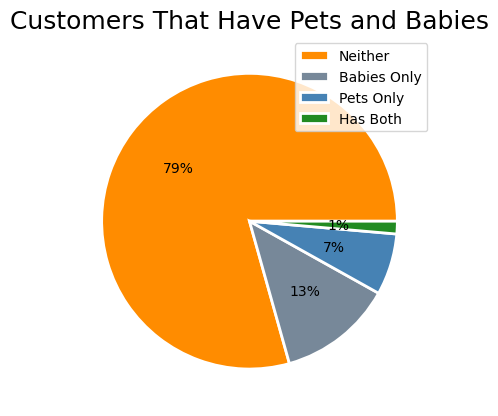

In [8]:
#pie chart for customers babies/pets
colors = ['darkorange', 'lightslategray', 'steelblue', 'forestgreen']

pie_pets_kids = df_cust['pets_babies'].value_counts().plot.pie(legend = True, ylabel = '', autopct = ('%1.f%%'),
                                                             wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
                                                             colors = colors, labeldistance = None)

plt.title('Customers That Have Pets and Babies', fontsize = 18)

79% of customers have neither babies nor pets.

### d. Pie Chart 'Average Spent Per Order'

Text(0.5, 1.0, 'Average Spent Per Order')

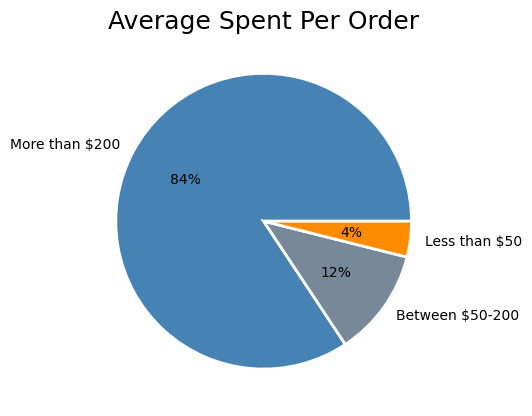

In [9]:
#pie chart for average spent per order
colors = ['steelblue', 'lightslategray', 'darkorange']

pie_order_spending = df_cust['spending_flag_ords'].value_counts().plot.pie(autopct = ('%1.f%%'), colors = colors, 
                                                                           wedgeprops = { 'linewidth' : 2,
                                                                                         'edgecolor' : 'white' },
                                                                           labels = ['More than $200', 'Between $50-200',
                                                                           'Less than $50'], ylabel = '')

plt.title('Average Spent Per Order', fontsize = 18)
                                                                     

The vast majority of orders cost more than $200.

In [10]:
#crosstab income/age
x4 = pd.crosstab(df_cust['income_category'], df_cust['age_category'])
x4

age_category,Adult,Senior,Young Adult
income_category,,,
High income,7521,5231,258
Low income,11619,5698,9814
Middle income,57090,32320,33079


### e. Pie Charts 'Income Categories by Age Group'

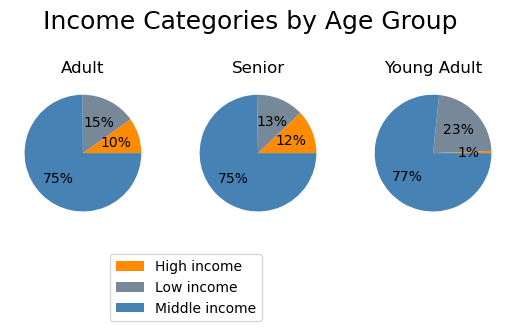

In [11]:
#create pie charts for percentage of income category/age group
colors = ['darkorange', 'lightslategray', 'steelblue']

x4 = pd.crosstab(df_cust['income_category'], df_cust['age_category'])
pies_income_age = x4.plot.pie(autopct = ('%1.f%%'), colors = colors, sharex = False, subplots = True,
                              labeldistance = None, title = ['Adult', 'Senior', 'Young Adult'],
                              legend = False, ylabel = '').ravel()[0].get_figure()

plt.legend(loc = 'center', bbox_to_anchor = (.4, .4),
           bbox_transform = plt.gcf().transFigure)
plt.suptitle('Income Categories by Age Group', fontsize = 18)
plt.subplots_adjust(top = 1.25)


Around 75% of all customers fall within the middle income range. 

In [12]:
#create and check cross between family status and spending flags
cross_famstat_spending = round(pd.crosstab(df_cust['spending_flag_ords'], df_cust['family_status'], 
                                          normalize = 'columns')*100, 2)
cross_famstat_spending

family_status,divorced/widowed,living with parents and siblings,married,single
spending_flag_ords,,,,
High-spender,84.49,84.38,84.33,84.16
Low-spender,4.06,3.84,3.86,4.03
Regular-spender,11.45,11.78,11.81,11.80


In [13]:
#export to Excel for report
cross_famstat_spending.to_clipboard()

In [14]:
#cross spending flag ords with region
cross_spending_region = round(pd.crosstab(df_cust['spending_flag_ords'], df_cust['region'], 
                                          normalize = 'columns')*100, 2)
x5 = cross_spending_region
x5

region,Midwest,Northeast,South,West
spending_flag_ords,,,,
High-spender,84.64,83.95,84.26,84.37
Low-spender,3.78,3.93,3.93,3.96
Regular-spender,11.58,12.12,11.80,11.67


### f. Bar Chart 'Spending Categories by Region'

[[Text(0, 0, 'High Spender\n>$200/order'),
  Text(1, 0, 'Low Spender\n<$50/order'),
  Text(2, 0, 'Regular Spender\n$50-200/order')]]

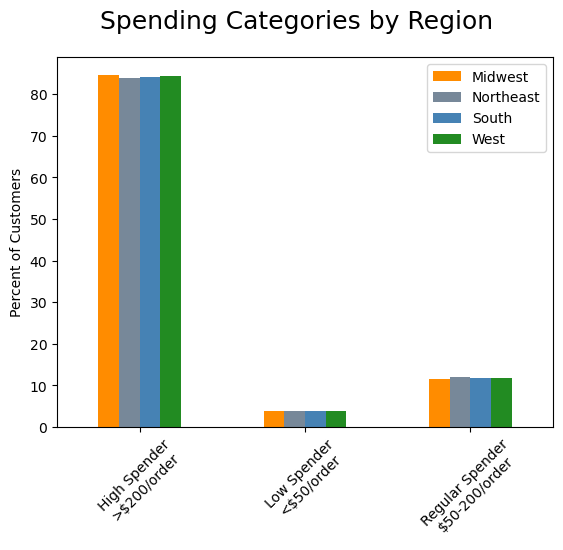

In [15]:
#grouped bar chart for region and average spent per order
colors = ['darkorange', 'lightslategray', 'steelblue', 'forestgreen']

bar_order_spending_region = x5.plot.bar(color = colors, xlabel = '', ylabel = 'Percent of Customers')

plt.xticks(rotation = 45)
plt.legend(title = '')
plt.suptitle('Spending Categories by Region', fontsize = 18)

ax = bar_order_spending_region
ax.set(xticklabels = ['High Spender\n>$200/order', 'Low Spender\n<$50/order', 'Regular Spender\n$50-200/order'])


Region does not appear to affect the amount customers spend per order.

## 04. Answer Key Questions and More Visualizations

In [16]:
#convert order_dow from numerical entries to 'weekday' with day names
df['weekday'] = ['Saturday' if day == 0 else
        'Sunday' if day == 1 else
        'Monday' if day == 2 else
        'Tuesday' if day == 3 else
        'Wednesday' if day == 4 else
        'Thursday' if day == 5 else
        'Friday' for day in df['order_day_of_week']]

In [17]:
#check new column
df['weekday'].value_counts(dropna = False)

Saturday     5908610
Sunday       5411686
Friday       4291304
Thursday     4033729
Monday       4024706
Tuesday      3669535
Wednesday    3624994
Name: weekday, dtype: int64

In [18]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'time_of_order', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spent', 'spending_flag', 'median_days_since_last_order',
       'freq_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_dependents', 'family_status', 'income', 'region',
       'activity_flag', 'age_category', 'income_category', 'department',
       'pet_owner', 'has_babies', 'has_kids', 'weekday'],
      dtype='object')

In [19]:
#drop unnecessary columns
df.drop(columns = ['aisle_id', 'department_id'], inplace = True)

,order_id,user_id,order_number,order_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,region,activity_flag,age_category,income_category,department,pet_owner,has_babies,has_kids,weekday
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,40423,South,High-activity Customer,Young Adult,Low income,beverages,No,No,Yes,Monday
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,40423,South,High-activity Customer,Young Adult,Low income,beverages,No,No,Yes,Tuesday
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,40423,South,High-activity Customer,Young Adult,Low income,beverages,No,No,Yes,Tuesday
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,40423,South,High-activity Customer,Young Adult,Low income,beverages,No,No,Yes,Wednesday
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,40423,South,High-activity Customer,Young Adult,Low income,beverages,No,No,Yes,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,53755,West,High-activity Customer,Young Adult,Middle income,beverages,No,No,No,Wednesday
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,53755,West,High-activity Customer,Young Adult,Middle income,beverages,No,No,No,Monday
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,53755,West,High-activity Customer,Young Adult,Middle income,beverages,No,No,No,Friday
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,53755,West,High-activity Customer,Young Adult,Middle income,beverages,No,No,No,Friday


In [20]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'time_of_order', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_spent', 'spending_flag', 'median_days_since_last_order',
       'freq_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'number_dependents', 'family_status', 'income', 'region',
       'activity_flag', 'age_category', 'income_category', 'department',
       'pet_owner', 'has_babies', 'has_kids', 'weekday'],
      dtype='object')

### a. Heatmap 'Frequency of Orders Placed by Day and Time'

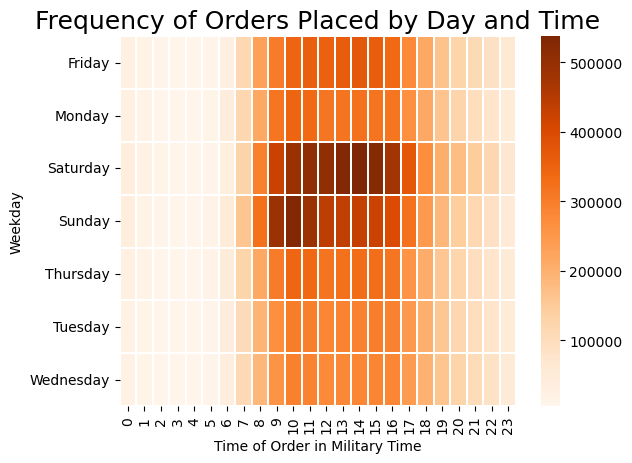

In [21]:
#create a heatmap showing busiest/least busy ordering times by dow and time of day
df_group = df.groupby(['weekday', 'time_of_order'])['order_id'].agg('count').reset_index().rename({'order_id' : 'order_count'})
pivot = df_group.pivot('weekday', 'time_of_order', 'order_id')

ax = sns.heatmap(pivot, cmap = 'Oranges', linewidths = .2)
plt.title('Frequency of Orders Placed by Day and Time', fontsize = 18)
plt.xlabel('Time of Order in Military Time')
plt.ylabel('Weekday')

heatmap_dow_time = ax

Saturday and Sunday are the days in which customers place the most orders. On Saturday, 
most orders are placed between 1 and 3 p.m. On Sunday, most orders are placed at 10 a.m.

In [22]:
#create order_cost column 
df['order_cost'] = df.groupby('order_id')['prices'].transform('sum')

In [23]:
#sort order cost from highest to lowest
df_maxspent = df.sort_values(by = ['order_cost'], ascending = False)

In [24]:
#create df by unique user
df_maxspent_unique = df_maxspent.drop_duplicates(subset = ['user_id'])

### b. Bar Chart 'Time of Most Expensive Orders'

Text(0.5, 1.0, 'Time of Most Expensive Orders')

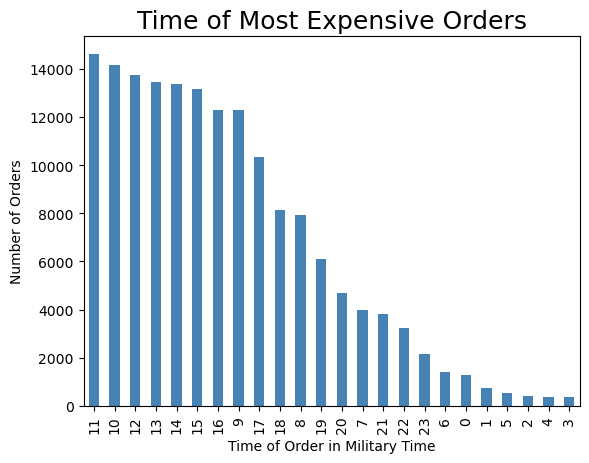

In [25]:
#create bar chart to display when people spend the most money

bar_maxspent_hour = df_maxspent_unique.time_of_order.value_counts().plot(kind = 'bar', 
                                                                         ylabel = 'Number of Orders', 
                                                                         xlabel = 'Time of Order in Military Time',
                                                                         color = 'steelblue')

plt.title('Time of Most Expensive Orders', fontsize = 18)

The most expensive orders are placed between 9 am and 4 pm.

In [26]:
#rename column for clarity
df.rename(columns = {'price_range_loc' : 'price_range'}, inplace = True)

In [27]:
#how many products are purchased from diff price ranges
cross_pricerange_order_id = pd.crosstab(df['order_id'], df['price_range'])
cross_pricerange_order_id

price_range,High-range product,Low-range product,Mid-range product
order_id,,,
2,0,1,8
3,0,0,8
4,0,5,8
5,0,9,17
6,0,1,2
...,...,...,...
3421079,0,1,0
3421080,0,3,6
3421081,0,0,7


### c. Pie Chart 'Products Ordered by Price Range'

Text(0.5, 1.0, 'Products Ordered by Price Range')

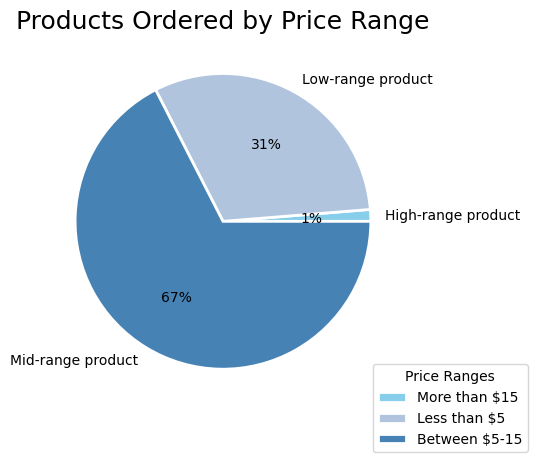

In [28]:
#pie chart of product price distribution
x3 = df['price_range'].value_counts().sort_index()
colors = ['skyblue', 'lightsteelblue', 'steelblue']

pie_price_range = x3.plot.pie(autopct = ('%1.f%%'), colors = colors, 
                              wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
                              ylabel = '')
plt.legend(labels = ['More than $15', 'Less than $5', 'Between $5-15'], bbox_to_anchor=(1,0), 
           loc="lower right", bbox_transform = plt.gcf().transFigure, title = 'Price Ranges')
plt.title('Products Ordered by Price Range', fontsize = 18)

The majority of products ordered fall in the mid-range.

In [65]:
#determine number of products ordered from each department
data_dept = df['department'].value_counts().sort_values(ascending = False)

data_dept

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

In [56]:
result = []

for value in df['department']:
  if value == 'produce':
    result.append('29.32%')
  elif value == 'dairy eggs':
    result.append('16.72%')
  elif value == 'snacks':
    result.append('8.93%')
  elif value == 'beverages':
    result.append('8.31%')
  elif value == 'frozen':
    result.append('6.85%')
  else:
    result.append("29.87%")
    
    

In [57]:
df['dept_percentage'] = result
df['dept_percentage'].value_counts(dropna = False)

29.87%    9248071
29.32%    9079273
16.72%    5177182
8.93%     2766406
8.31%     2571901
6.85%     2121731
Name: dept_percentage, dtype: int64

In [53]:
#copy to Excel for report

data_perc['percentage'].to_clipboard()

### d. Pie Chart 'Top 5 Departments'

Text(0.5, 1.0, 'Top 5 Departments')

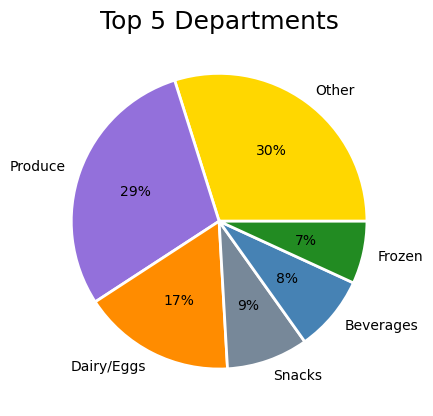

In [88]:
#pie of top 5 depts
data = df['dept_percentage'].value_counts(ascending = False)
colors = ['gold', 'mediumpurple', 'darkorange', 'lightslategray', 'steelblue', 'forestgreen']


pie_top5_depts = data.plot.pie(autopct = ('%1.f%%'), colors = colors, labels = ['Other', 'Produce', 'Dairy/Eggs',
                                                                                'Snacks', 'Beverages', 'Frozen'
                                                                               ], ylabel = '',
                               wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
                                                                     
plt.title('Top 5 Departments', fontsize = 18)
                                                                      

Produce is the most frequently ordered from department.

In [71]:
#extract array of user ids from df_cust
baby_array = df_cust['user_id'][df_cust['has_babies'] == 'Yes'].to_numpy()

In [72]:
#make a list of user ids of customers that have babies
bb_list = baby_array.tolist()

In [73]:
#make df that includes data only from user ids in bb_list
df_bb = df[df['user_id'].isin(bb_list)]
df_bb.shape

(7354162, 45)

In [86]:
#retrieve top 5 departments users in bb_list ordered from
baby_data = df_bb['department'].value_counts().sort_values(ascending = False).head()

baby_data

produce       2088454
dairy eggs    1295234
snacks         601584
frozen         512873
beverages      487448
Name: department, dtype: int64

### e. Pie Chart 'Top 5 Departments for Customers With Babies'

Text(0.5, 1.0, 'Top 5 Departments for Customers With Babies')

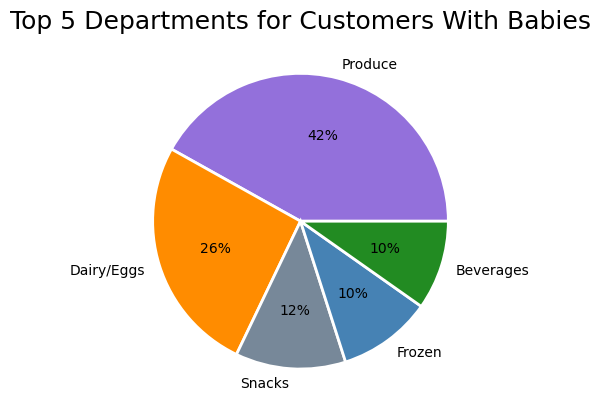

In [87]:
#pie chart of top 5 depts users with babies ordered from

colors = ['mediumpurple', 'darkorange', 'lightslategray', 'steelblue', 'forestgreen']


pie_top5_depts_babies = baby_data.plot.pie(autopct = ('%1.f%%'), colors = colors, 
                                           labels = ['Produce', 'Dairy/Eggs', 'Snacks', 'Frozen', 'Beverages'
                                                    ], ylabel = '', wedgeprops = { 'linewidth' : 2,
                                                                                  'edgecolor' : 'white' })
                                                                     
plt.title('Top 5 Departments for Customers With Babies', fontsize = 18)
                              

In [89]:
#extract array of user ids from df_cust
pet_array = df_cust['user_id'][df_cust['pet_owner'] == 'Yes'].to_numpy()

In [90]:
#make a list of user ids of customers that have pets
pet_list = pet_array.tolist()

In [91]:
#make df that includes data only from user ids in pet_list 
df_pet = df[df['user_id'].isin(pet_list)]
df_pet.shape

(3451351, 45)

In [92]:
#retrieve top 5 departments users in pet_list ordered from
pet_data = df_pet['department'].value_counts().sort_values().tail(5)
pet_data

frozen        279796
snacks        305181
beverages     319352
dairy eggs    524135
produce       769614
Name: department, dtype: int64

### f. Pie Chart 'Top 5 Departments Customers with Pets Ordered From'

Text(0.5, 1.0, 'Top 5 Departments for Customers With Pets')

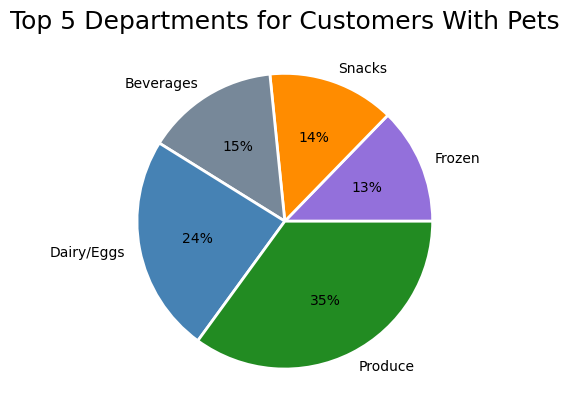

In [93]:
#pie chart of top 5 depts users with pets ordered from
colors = ['mediumpurple', 'darkorange', 'lightslategray', 'steelblue', 'forestgreen']


pie_top5_depts_pets = pet_data.plot.pie(autopct = ('%1.f%%'), colors = colors, labels = ['Frozen', 'Snacks',
                                                                                         'Beverages', 'Dairy/Eggs',
                                                                                         'Produce'], 
                                           ylabel = '', wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
                                                                     
plt.title('Top 5 Departments for Customers With Pets', fontsize = 18)
                              

In [94]:
#extract array of user ids from df
kids_array = df['user_id'][df['number_dependents'] != 0].to_numpy()

In [95]:
#make a list of user ids of customers that have kids
kids_list = kids_array.tolist()

In [96]:
#make df that includes data only from user ids in kids_list 
df_children = df[df['user_id'].isin(kids_list)]
df_children.shape

(23224883, 45)

In [97]:
#retrieve top 5 departments users in kids_list ordered from
kid_data = df_children['department'].value_counts().sort_values().tail(5)
kid_data

frozen        1592383
beverages     1926560
snacks        2075968
dairy eggs    3882806
produce       6803832
Name: department, dtype: int64

### g. Pie Chart 'Top 5 Departments for Customers with Children'

Text(0.5, 1.0, 'Top 5 Departments for Customers With Children')

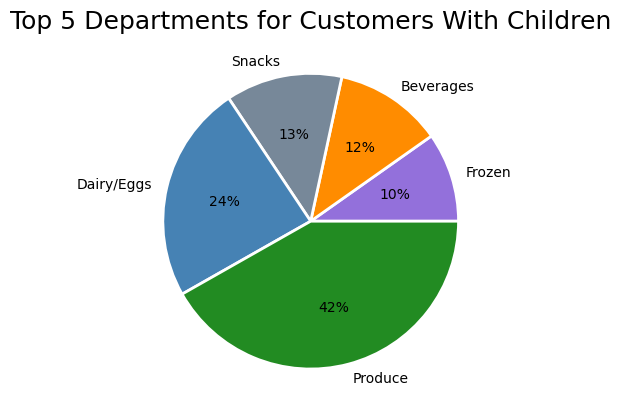

In [98]:
#pie chart of top 5 depts users with kids ordered from
colors = ['mediumpurple', 'darkorange', 'lightslategray', 'steelblue', 'forestgreen']


pie_top5_depts_kids = kid_data.plot.pie(autopct = ('%1.f%%'), colors = colors, labels = ['Frozen', 'Beverages',
                                                                                         'Snacks', 'Dairy/Eggs',
                                                                                         'Produce'], 
                                           ylabel = '', wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })
                                                                     
plt.title('Top 5 Departments for Customers With Children', fontsize = 18)
                              

### h. Bar Chart 'Top 5 Departments'

Text(0.5, 1.0, 'Top 5 Departments')

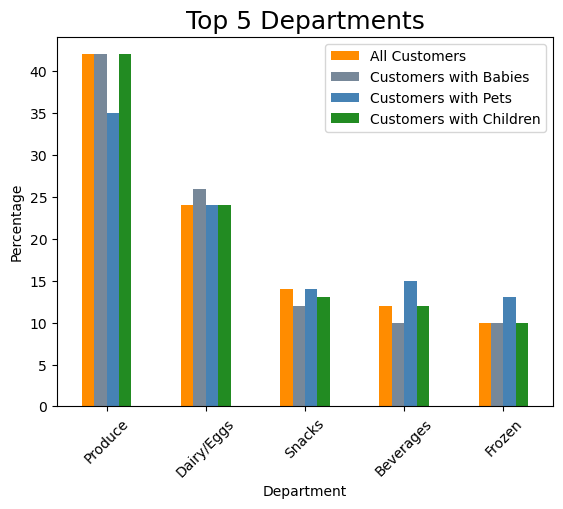

In [99]:
#assign data to variables
top5_groups = [[42, 42, 35, 42], [24, 26, 24, 24], [14, 12, 14, 13], [12, 10, 15, 12], [10, 10, 13, 10]]
top5_labels = ['Produce', 'Dairy/Eggs', 'Snacks', 'Beverages', 'Frozen']

#create df for plot
df_top5_profile = pd.DataFrame(top5_groups, index=top5_labels)
df_top5_profile

#create grouped bar chart showing top 5 depts across kids/babies/pets/all custs
colors = ['darkorange', 'lightslategray', 'steelblue', 'forestgreen']

bar_top5_profiles = df_top5_profile.plot.bar(color = colors)

plt.legend(title = '', labels = ['All Customers', 'Customers with Babies', 'Customers with Pets', 
                                'Customers with Children'])
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.xticks(rotation = 45)
plt.title('Top 5 Departments', fontsize = 18)

### i. Grouped Bar Chart 'Top 5 Departments by Income Category'

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Beverages'),
  Text(1, 0, 'Dairy Eggs'),
  Text(2, 0, 'Frozen'),
  Text(3, 0, 'Produce'),
  Text(4, 0, 'Snacks')])

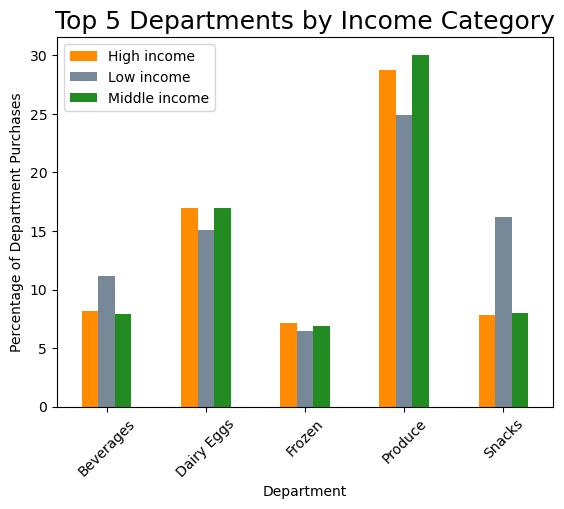

In [100]:
#create grouped bar charts by income category and top 5 depts
x2 = round(pd.crosstab(df['department'], df['income_category'], normalize = 'columns')*100, 2)
x2 = x2.sort_index()
colors = ['darkorange', 'lightslategray', 'forestgreen']

bar_income_depts = x2.drop(['alcohol', 'babies', 'bakery', 'breakfast', 'bulk', 'canned goods',
                           'deli', 'dry goods pasta', 'household', 'international', 'meat seafood',
                           'missing', 'other', 'pantry', 'personal care', 'pets']).plot.bar(color = colors, xlabel = 'Department',
                                                                                            ylabel = 'Percentage of Department Purchases')
ax = bar_income_depts
ax.set(xticklabels = ['Beverages', 'Dairy Eggs', 'Frozen', 'Produce', 'Snacks'])
plt.title('Top 5 Departments by Income Category', fontsize = 18)
plt.legend(title = '')
plt.xticks(rotation = 45)


Low income customers buy a higher percentage of beverages and snacks than the other customers.


In [101]:
#create median day flag column
df_cust.loc[df_cust['median_days_since_last_order'] < 7, 'med_day_flag'] = 'Less than 1 week'
df_cust.loc[(df_cust['median_days_since_last_order'] >= 7) & (df_cust['median_days_since_last_order'] < 14), 
           'med_day_flag'] = '1-2 weeks'

df_cust.loc[(df_cust['median_days_since_last_order'] >= 14) & (df_cust['median_days_since_last_order'] < 21), 
            'med_day_flag'] = '2-3 weeks'   
df_cust.loc[(df_cust['median_days_since_last_order'] >= 21) & (df_cust['median_days_since_last_order'] < 28), 
            'med_day_flag'] = '3-4 weeks'
df_cust.loc[df_cust['median_days_since_last_order'] >=28, 'med_day_flag'] = 'More than 4 weeks'
 
           

In [102]:
#check new column
df_cust['med_day_flag'].value_counts(dropna = False)

1-2 weeks            66162
2-3 weeks            30652
Less than 1 week     29291
More than 4 weeks    21167
3-4 weeks            15358
Name: med_day_flag, dtype: int64

### j. Grouped Bar Chart 'Median Time Between Orders by Customer Loyalty'

Text(0.5, 1.0, 'Median Time Between Orders')

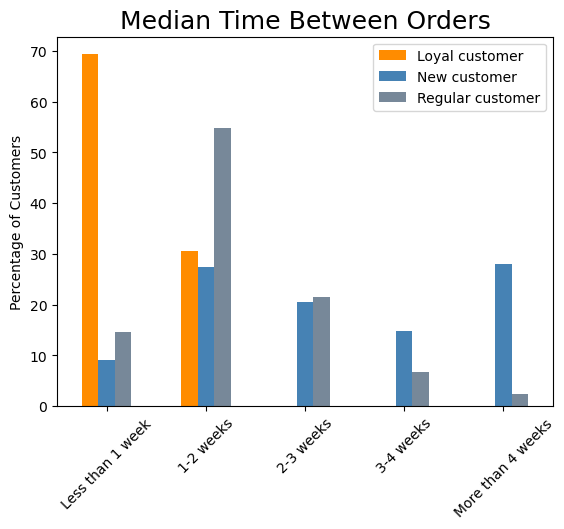

In [103]:
#create bar chart of median days between orders by customer loyalty
x1 = round(pd.crosstab(df_cust['med_day_flag'], df_cust['loyalty_flag'], normalize = 'columns')
           *100, 2)
x1 = x1.sort_index()
flag_order = ['Less than 1 week', '1-2 weeks', '2-3 weeks', '3-4 weeks', 'More than 4 weeks']
colors = ['darkorange', 'steelblue', 'lightslategray']

bar_days_loyalty = x1.loc[flag_order].plot.bar(color = colors, xlabel = '', ylabel = 'Percentage of Customers', 
                                               sort_columns = True) 
plt.xticks(rotation = 45)
plt.legend(title = '')
plt.title('Median Time Between Orders', fontsize = 18)

Loyal customers place orders most frequently.

### k. Histogram 'Median Days Between Orders'

Text(0.5, 1.0, 'Median Days Between Orders')

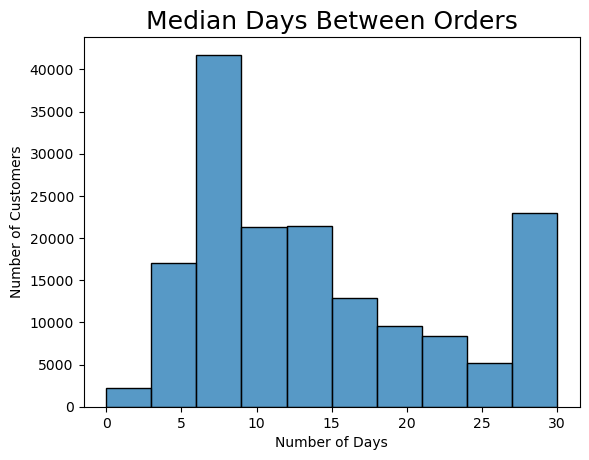

In [104]:
#create histogram of med_days

hist_ord_freq = sns.histplot(data = df_cust, x = 'median_days_since_last_order', bins = 10)

hist_ord_freq.set(xlabel = 'Number of Days', ylabel = 'Number of Customers')
plt.title('Median Days Between Orders', fontsize = 18)

In [105]:
#crosstab to view days between orders and region
cross1 = pd.crosstab(df_cust['med_day_flag'], df_cust['region'])
cross1

region,Midwest,Northeast,South,West
med_day_flag,,,,
1-2 weeks,14277,11574,23282,17029
2-3 weeks,6663,5521,10776,7692
3-4 weeks,3354,2627,5451,3926
Less than 1 week,6245,5186,10386,7474
More than 4 weeks,4615,3673,7519,5360


Most subsequent orders are placed around 7 and 30 days after the last order.

### l. Histogram 'Median Days Since Last Order by Region'

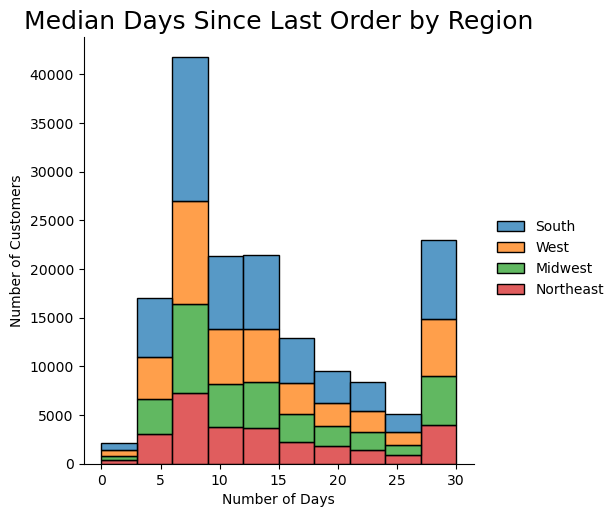

In [106]:
#histogram using seaborn of median days since last order by region
sns.color_palette(['darkorange', 'lightslategray', 'steelblue', 'forestgreen']) 

displot_med_days_region = sns.displot(df_cust, x = 'median_days_since_last_order', hue = 'region', 
                                      multiple = 'stack', bins = 10)

displot_med_days_region.set(xlabel = 'Number of Days', ylabel = 'Number of Customers')
plt.title('Median Days Since Last Order by Region', fontsize = 18)
displot_med_days_region._legend.set_title('')
for t, l in zip(displot_med_days_region._legend.texts, ['South', 'West', 'Midwest', 'Northeast']): 
    t.set_text(l)


Region does not seem to affect the number of days between customers' orders.

In [107]:
#cross for age/family status
cross_age_fam_stat = pd.crosstab(df_cust['age_category'], df_cust['family_status'])
cross_age_fam_stat

family_status,divorced/widowed,living with parents and siblings,married,single
age_category,,,,
Adult,3128,0,57138,15964
Senior,10702,0,32547,0
Young Adult,0,7608,24611,10932


### m. Grouped Bar Chart 'Age and Family Status'

Text(0.5, 1.0, 'Age and Family Status')

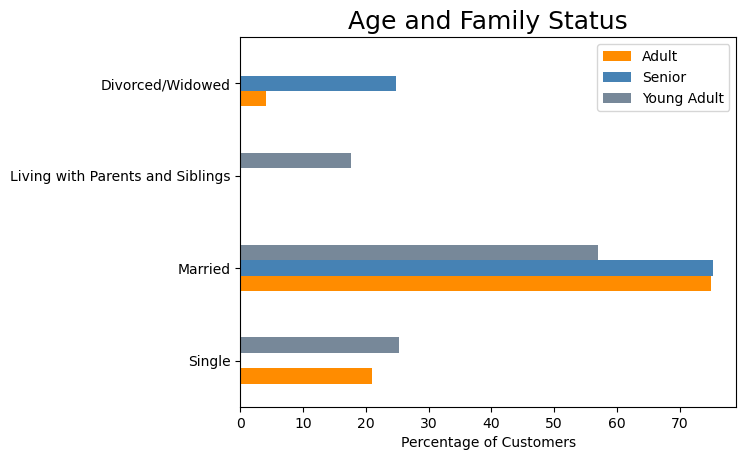

In [108]:
#crosstab to use for plot
cross_age_famstat = round(pd.crosstab(df_cust['family_status'], df_cust['age_category'], normalize = 'columns')
                          *100, 2)
cross_age_famstat = cross_age_famstat.sort_index()

#create grouped barchart
yaxis_order = ['single', 'married', 'living with parents and siblings', 'divorced/widowed']
colors = ['darkorange', 'steelblue', 'lightslategray']


bar_age_famstat = cross_age_famstat.loc[yaxis_order].plot.barh(color = colors, xlabel = '', sort_columns = True)
                                                               
ax = bar_age_famstat
ax.set(yticklabels = ['Single', 'Married', 'Living with Parents and Siblings', 'Divorced/Widowed'])
plt.legend(title = '')
ax.set_xlabel('Percentage of Customers')
plt.title('Age and Family Status', fontsize = 18)

## 05. Export Charts and DF

In [109]:
bar_income_avg_spent.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',
                                                 'bar_income_avg_spent.png'), bbox_inches = 'tight')

In [110]:
pie_pets_kids.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_pets_kids.png'))

In [111]:
pie_order_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_order_spending.png'))

In [112]:
pies_income_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pies_income_age.png'))


In [113]:
bar_order_spending_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',
                                                      'bar_order_spending_region.png'), bbox_inches = 'tight')

In [114]:
heatmap_dow_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'heatmap_dow_time.png'), 
                                bbox_inches = 'tight')

In [115]:
bar_maxspent_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_maxspent_hour.png'))

In [116]:
pie_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_range.png'))

In [117]:
pie_top5_depts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_top5_depts.png'))

In [118]:
pie_top5_depts_babies.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_top5_depts_babies.png'))

In [119]:
pie_top5_depts_pets.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_top5_depts_pets.png'))

In [120]:
pie_top5_depts_kids.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_top5_depts_kids.png'))

In [121]:
bar_top5_profiles.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_top5_profiles.png'),
                                bbox_inches = 'tight')

In [122]:
bar_income_depts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_depts.png'), 
                                bbox_inches = 'tight')

In [123]:
bar_days_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_days_loyalty.png'), 
                                bbox_inches = 'tight')

In [124]:
hist_ord_freq.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ord_freq.png'))

In [125]:
displot_med_days_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations',
                                                    'displot_med_days_region.png'), bbox_inches = 'tight')

In [126]:
bar_age_famstat.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_famstat.png'), 
                               bbox_inches = 'tight')

In [127]:
df_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'real_final_cust.pkl'))

In [128]:
df.to_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'final_full_df.pkl'))